# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (9):

(component kg in one M^3 concrete)(7):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

(Measurements)(2)
* SLUMP (cm)
* FLOW (cm)

Target variable (1):
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Loading data

In [3]:
data = pd.read_csv('cement_slump.csv')
data.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820


# EDA and Graphical analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [5]:
data.isnull().sum()

Cement                                0
Slag                                  0
Fly ash                               0
Water                                 0
SP                                    0
Coarse Aggr.                          0
Fine Aggr.                            0
SLUMP(cm)                             0
FLOW(cm)                              0
Compressive Strength (28-day)(Mpa)    0
dtype: int64

<AxesSubplot:>

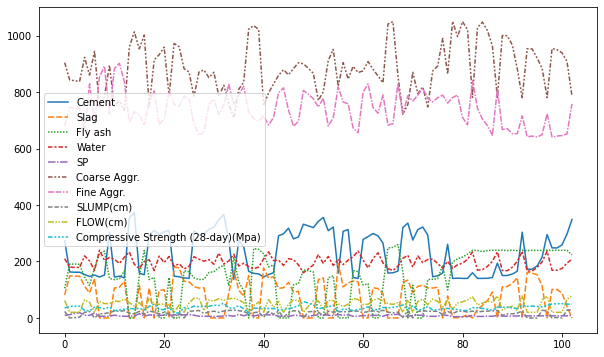

In [8]:
sns.lineplot(data=data, )

# Data Preprocessing 

### Features and target variable

In [11]:
X = data.drop('Compressive Strength (28-day)(Mpa)', axis=1)
y = data['Compressive Strength (28-day)(Mpa)']

### Splitting data into training and testing

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1000)

## Scaling

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [21]:
SS = StandardScaler()

In [22]:
SS.fit(X_train)

StandardScaler()

##  1. Model Building (Linear Regression)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
LR = LinearRegression()

In [17]:
LR.fit(X_train, y_train)

LinearRegression()

In [18]:
y_train_pred = LR.predict(X_train)
y_train_pred

array([36.51010798, 37.30230882, 38.27647796, 31.72190377, 53.08164374,
       31.67765569, 49.29282038, 18.07454052, 32.97732658, 41.75956328,
       29.32684082, 38.13587873, 28.20373294, 40.25976449, 31.07491906,
       37.03067233, 35.83281448, 50.7352983 , 29.94409724, 44.31724973,
       43.16095551, 25.35241053, 42.51927656, 32.01757391, 17.05951978,
       39.52492083, 39.27985958, 36.40683244, 40.90116306, 40.24290155,
       45.43825641, 44.1613937 , 28.01611479, 46.18418365, 49.07316327,
       28.40140101, 23.91792391, 47.64574347, 28.38201394, 33.54755186,
       31.62236978, 42.00015065, 42.07366717, 46.01260091, 33.89911682,
       52.1075404 , 39.49694386, 30.44016123, 32.08877335, 43.03142227,
       35.22412678, 28.60846567, 28.39552423, 32.42360718, 34.77684143,
       34.07971501, 40.26215945, 33.23473269, 45.32556907, 29.65668277,
       29.15843898, 27.11419185, 34.74517736, 36.17290569, 34.68835651,
       38.49322677, 30.91446959, 37.62830909, 34.1598438 , 39.92

In [19]:
y_test_pred = LR.predict(X_test)
y_test_pred

array([37.42503159, 41.41347884, 29.12058224, 48.51967511, 38.64504109,
       43.17956574, 48.76444238, 42.59673975, 26.05660679, 40.13945284,
       32.28113372, 38.91024793, 26.0548641 , 28.1503021 , 33.4763088 ,
       35.80224336, 47.30276894, 20.46970173, 18.07109912, 38.08847237,
       25.84170618, 34.16475121, 26.97219939, 36.73640663, 38.5389807 ,
       31.19022716])

### 1.1 Interpret the model

### 1.2 Model Evaluation

# 2. Regularization

## 2.1 Ridge (Apply and evaluate)

## 2.2 Lasso (Apply and evalute)

## 2.3 Elastic-Net (Apply and evaluate )
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV